In [1]:
function rhs=T(n,x)
if (n==0) rhs=1; endif
if (n==1) rhs=x; endif
if (n>1)
rhs=2*x*T(n-1,x)-T(n-2,x);
endif
endfunction

function rhs=dT(n,x)
if (n==0) rhs=0; endif
if (n==1) rhs=1; endif
if (n==2) rhs=4*x; endif
if (n>2)
rhs=2*T(n-1,x)+2*x*dT(n-1,x)-dT(n-2,x);
endif
endfunction


%%Define the function f
function rhs=f(t,y) 
% n: the number of ODE in ODE system
% h: step-size    
    
    rhs(1)=y(2);
    rhs(2)=-1/4*y(1);
endfunction

In [6]:
%% RKC first method with s stages.
function [h,t,y]=rkc_first(a,b,y0,N,s)
%%Input   %a,b: starting, final time 
          %y0: initial value
          %N: number of time interval
          %s: number of stages
%%Output  %h: stepsize
          %t: timegrid
          %y: numerical solution
    h = (b-a)/N;
    t = a:h:b;
    epsilon = 0.05;  %damping parameter    
    w0 = 1+epsilon/s^2;
    w1 = T(s,w0)/dT(s,w0);
    %%Define coefficients
    b = a = mu = nu = c= mu_t = gamma_t = zeros(s+1,1);
    
    for i=1:s+1
        b(i)=1/(T(i-1,w0));
    endfor
    
    % a_j+1=1-b_{j+1}*T_j(w0)
    for i=2:s+1
        a(i)=1-b(i)*T(i-1,w0);
    endfor    

    %mu_j+1=-2b_jw_0/b_{j-1}
    for i=3:s+1
        mu(i) = 2 * w0 * b(i) / b(i-1);
    endfor
    
    %nu_j=-b_j/(b_{j-2})
    for i = 3:s+1
        nu(i) = -b(i) / b(i-2); 
    endfor
    
    %c_j=w1*b_j*T'_j(w0)
    for i=2:s
        c(i) = w1 * b(i) * dT(i-1,w0);
    endfor    
    c(s) = 1;
    
    %mu_t(i) = 2 * w1*b(i) / b(i-1)
    mu_t(2) = b(2)*w1;
    for i = 3:s+1
        mu_t(i) = 2 * w1 *b(i) / b(i-1);
    endfor
    
    %gamma_t= -a_{j-1} *mu_t(j)
    gamma_t(2) = c(2);
    for i = 3:s+1
        gamma_t(i) = - a(i-1) * mu_t(i);
    endfor
    
    %%%% Main loop
    g = zeros(s+1,2);
    y=zeros(N+1,2);
    y(1,:) = y0;
    for i = 1:N
        g(1,:) = y(i,:);
        g(2,:) = g(1,:) + mu_t(2) * h * f(t(i)+c(1)*h,g(1,:));
        for j=3:s+1
            g(j,:) = (1-mu(j)-nu(j)) * g(1,:) + mu(j)* g(j-1,:) + nu(j)*g(j-2,:) + mu_t(j) * h * f(t(i)+c(j-1)*h,g(j-1,:)) + gamma_t(j) * h * f(t(i)+c(1)*h,g(1,:));
        endfor
        y(i+1,:) = g(s+1,:);
    endfor      
endfunction

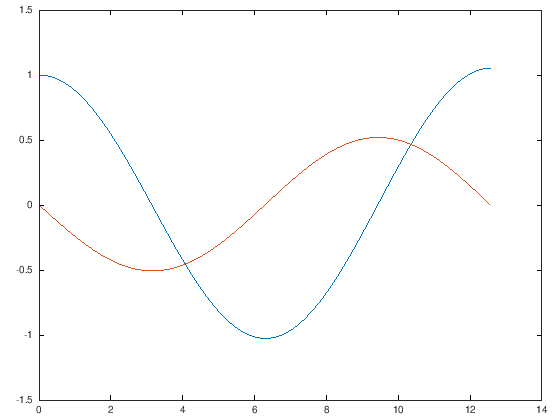

In [7]:
%%Plot the numerical solution.
[h,t,y] = rkc_first(0,4*pi,[1 0],256,5);
plot(t,y(:,1),t,y(:,2));

In [8]:
%% Compare with exact solution
N=1024;
t_n=linspace(0,4*pi,N+1);
exact=zeros(N+1,2);
exact(:,1)=cos(t_n/2);
exact(:,2)=-1/2*sin(t_n/2);

In [9]:
N=2^10;
for k=1:5
[h,t,y] = rkc_first(0,4*pi,[1 0],N,5);
t_n=linspace(0,4*pi,N+1);
exact=zeros(N+1,2);
exact(:,1)=cos(t_n/2);
exact(:,2)=-1/2*sin(t_n/2);
N=N*2;
norm (y-exact, 'inf')
end

ans =  0.013692


ans =  0.0068231


ans =  0.0034059


ans =  0.0017015


ans =  0.00085039


In [10]:
N=2^10;
for k=1:5
[h,t,y] = rkc_first(0,4*pi,[1 0],N,10);
t_n=linspace(0,4*pi,N+1);
exact=zeros(N+1,2);
exact(:,1)=cos(t_n/2);
exact(:,2)=-1/2*sin(t_n/2);
N=N*2;
norm (y-exact, 'inf')
end

ans =  0.013480


ans =  0.0067179


ans =  0.0033534


ans =  0.0016753


ans =  0.00083731


In [11]:
%%% Using EE method to solve ODEs.
function[h,t,y] = EE(a,b,y0,N)
%%Input   %a,b: starting, final time 
          %y0: initial value
          %N: number of time interval
%%Output  %h: stepsize
          %t: timegrid
          %v: numerical solution

h=(b-a)/N;
t=linspace(a,b,N+1);
m=length(y0);
y=zeros(N+1,m); 
%%RK2
y(1,:)=y0;
for j=1:N
k_1=f(t(j),y(j,:));
y(j+1,:)=y(j,:)+h*k_1;
endfor
endfunction

 added to session magics.



In [12]:
N=2^10;
for k=1:5
[h,t,y] = EE(0,4*pi,[1 0],N);
t_n=linspace(0,4*pi,N+1);
exact=zeros(N+1,2);
exact(:,1)=cos(t_n/2);
exact(:,2)=-1/2*sin(t_n/2);
N=N*2;
norm (y-exact, 'inf')
end

ans =  0.020450


ans =  0.010174


ans =  0.0050747


ans =  0.0025342


ans =  0.0012663
